## PREDICTING EMPLOYEE ATTRITION

### BUSINESS UNDERSTANDING

Attrition is an inevitable part of any business. There will come a time when an employee wants to leave your company – for either personal or professional reasons. It is highly essential that the organization is aware of and prepared for employee attrition. Employees have could several reasons for leaving an organization. Reasons could be retirement, accidents, loss of life, sack, etc. After a thorough look at the data, some pertinent questions were answered.

Some of the questions to be answered are:

1. What is the effect of Income on attrition?
2. Which set of people are most likey to quit their job?
3. What is the impact of Age on Employee Attrition?


### DATA UNDERSTANDING

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

In [2]:
#Load data
attrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
attrition.info() #checking for the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
cols = attrition.columns #Creating an object for the list of columns

In [6]:
cols

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
numeric_cols = attrition._get_numeric_data() #Obtaining the numerical column in the dataset
numeric_cols.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [8]:
attrition.head(2) #Checking the first two rows of the dataframe

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


### DATA PREPARATION

In [9]:
#Creating a function to determine if the age of the individual is equal to or above 18
def above_eighteen(x):
    """
    The function above_eighteen helps to return the value 1 if the variable passed in is greater than eighteen and 0 if the variable is less than eighteen
    INPUT:
    x- the column or variable you want to convert
   
    Variable x should be numerical
    
    
    """
    if x >= 18:
        return 1
    else:
        return 0

In [10]:
attrition['Age_class'] = attrition['Age'].apply(above_eighteen) #apply the function created

In [11]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_class
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,1


In [12]:
count = attrition['Attrition'].value_counts() #count of the target variable
count

No     1233
Yes     237
Name: Attrition, dtype: int64

In [13]:
employees_that_left = count[1] #count of the employees that left the organization
employees_retained = count[0] #count of the employees that were retained
perc_left = (employees_that_left/(employees_retained+employees_that_left))*100 #percentage of the employees that left
perc_retained = (employees_retained/(employees_retained+employees_that_left))*100 #percentage of the employees that were retained

print('The percenatge of employees remaining is {}% while the percentage that have left is {}%'.format(perc_left,perc_retained))

The percenatge of employees remaining is 16.122448979591837% while the percentage that have left is 83.87755102040816%


In [14]:
attrition['Gender'] = attrition['Gender'].replace('Male',0) #changing male to 0
attrition['Gender'] = attrition['Gender'].replace('Female',1) #changing female to 1

In [15]:
attrition['Attrition'] = attrition['Attrition'].replace('Yes',1)  #changing Yes to 1
attrition['Attrition'] = attrition['Attrition'].replace('No',0) #chaninging No to 0

In [16]:
attrition['OverTime'] = attrition['OverTime'].replace('Yes',1)  #changing Yes to 1
attrition['OverTime'] = attrition['OverTime'].replace('No',0) #chaninging No to 0

### DATA MODELLING

In [17]:
#This is to eliminate columns that have just one data level, i.e, they contain only one single value in their respective columns
eliminate = []
for col in attrition.columns:
    if len(attrition[col].unique()) == 1:
        eliminate.append(col)
        attrition.drop(col, inplace=True, axis=1)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

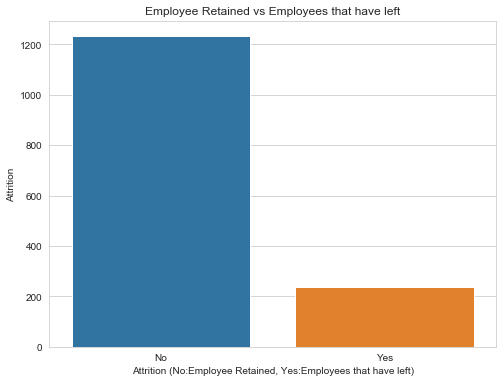

In [18]:
#Plot of Employee Retained vs Employees that have left
plt.figure(figsize=(8,6)) #Adjust size of the plot
plt.title('Employee Retained vs Employees that have left')
sns.barplot(x=count.index, y=count)
plt.xlabel('Number of Employees')
plt.xlabel('Attrition (No:Employee Retained, Yes:Employees that have left)')
plt.tight_layout

From the histogram above, we see that on a daily basis, an individual makes an average between 750 - 1000 

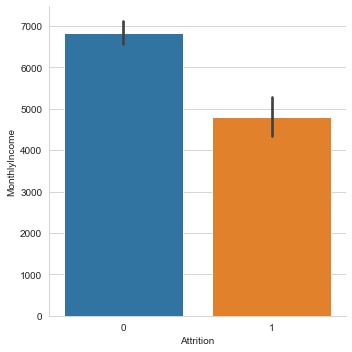

In [19]:
#plot of the monthly income vs Attrition
sns.catplot(y='MonthlyIncome', x='Attrition', data=attrition, kind='bar', orient='v')

Graph of the monthly income of employees that left against employeees that were retained. We see from the graph that:
1. Employees that left were recieving less monthly income than the people that stayed. From this, we have an intuition that one of the reason some employees left was because they are not being paid enough

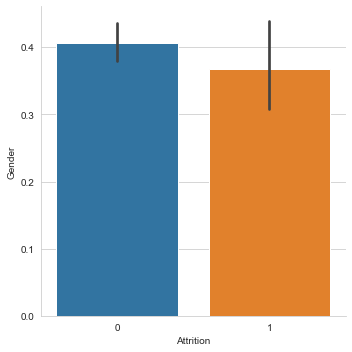

In [20]:
#plot of the monthly Gender vs Attrition
sns.catplot(y='Gender', x='Attrition', data=attrition, kind='bar', orient='v')

Employees that are male are most likely to quit from the graph above

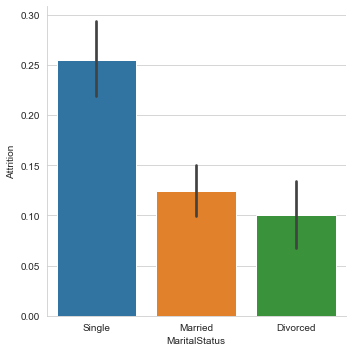

In [21]:
#plot of the MaritalStatus vs Attrition
sns.catplot(x='MaritalStatus', y='Attrition', data=attrition, kind='bar')

From the graph above, we discover that singles are most likey to quit, followed by Married and then Divorced

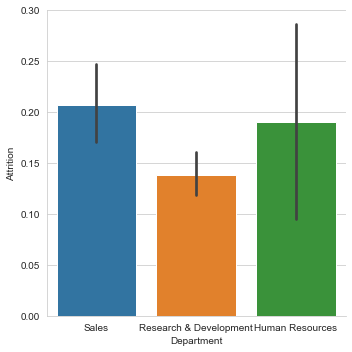

In [22]:
#plot of the Department vs Attrition
sns.catplot(x='Department', y='Attrition', data=attrition, kind='bar')

Sales and Human Resource deparment having a higher attrition rate 
compared to Research and Development Department

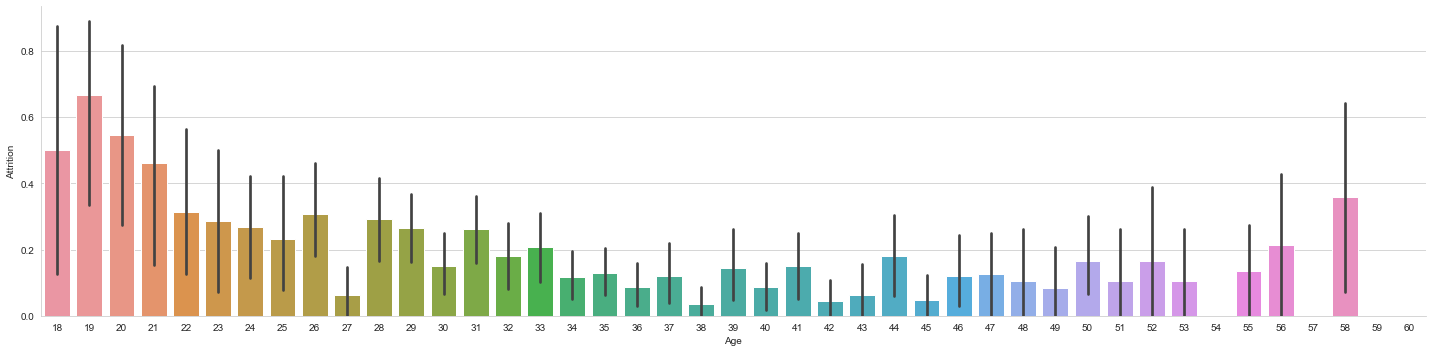

In [23]:
#plot of the Age vs Attrition
sns.catplot(x='Age', y='Attrition', kind='bar', data=attrition, aspect=4)

We discover that from the figure above young people (between 18 and 21) are most likely to quit

In [24]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [25]:
attrition.shape

(1470, 32)

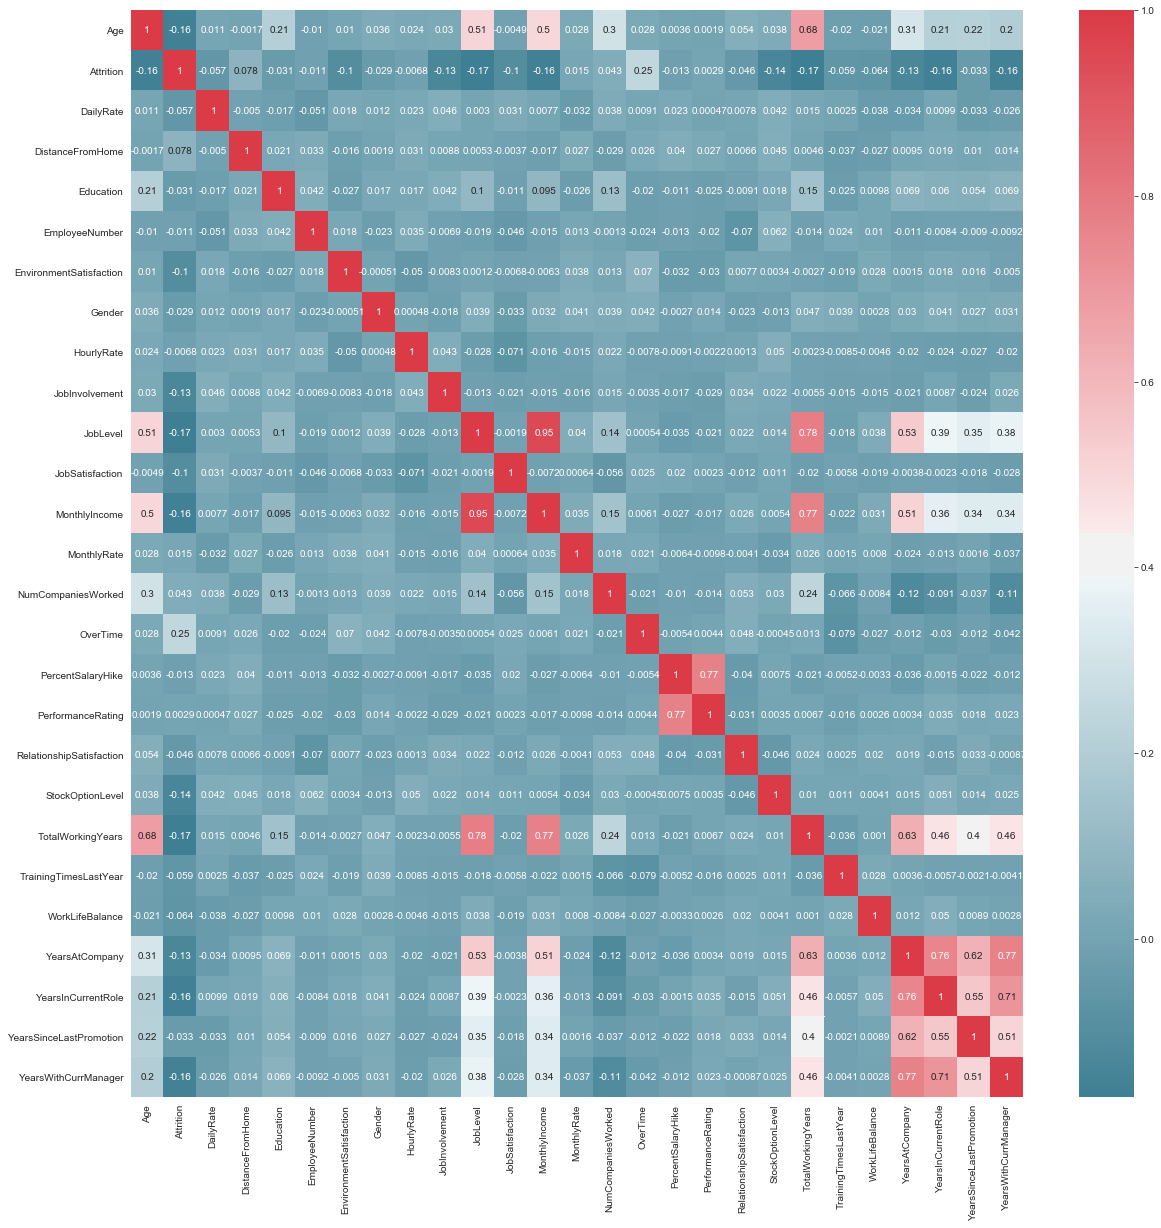

In [26]:
#Heatmap to show the correlation between numerical variables
plt.figure(figsize=(20,20))
sns.heatmap(attrition.corr(), annot=True, mask=np.zeros_like(attrition.corr(),dtype=np.bool), cmap=sns.diverging_palette(220, 10,as_cmap=True))

From the correlation matrix, we see that daily rate, hourlyrate and monthly rate are barely correlated with anything, so we would drop them

In [27]:
attrition.drop(['DailyRate', 'MonthlyRate', 'HourlyRate'], axis=1, inplace=True)

Other Conclusions from the correlation Matrix:
1. Years with current manager and years at company are highly correlated
2. Monthly income and total working years years are highly correlated
3. Years in current role and years at company are highly correlated
4. Job level and total working years are highly correlated

In [28]:
#One-hot encoding the variables
attrition_new = pd.get_dummies(attrition, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole','MaritalStatus'], drop_first=True)

In [29]:
attrition_new.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,1,2,1,3,2,4,...,0,0,0,0,0,0,1,0,0,1
1,49,0,8,1,2,3,0,2,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,2,2,4,4,0,2,1,3,...,0,1,0,0,0,0,0,0,0,1
3,33,0,3,4,5,4,1,3,1,3,...,0,0,0,0,0,1,0,0,1,0
4,27,0,2,1,7,1,0,3,1,2,...,0,1,0,0,0,0,0,0,1,0


In [30]:
X = attrition_new.drop('Attrition', axis=1)
y = attrition_new['Attrition']

In [31]:
#Importing Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [32]:
#Splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [33]:
#Spot-checking Algorithms
models = [] #Creating an empty list for the models

models.append(('LR', LogisticRegression())) #adding LogisticRegression to the empty list created
models.append(('KNN', KNeighborsClassifier())) #adding KNeighborsClassifier to the empty list created
models.append(('DTREE', DecisionTreeClassifier())) #adding DecisionTreeClassifier to the empty list created
models.append(('SVM', SVC())) #adding SVC to the empty list created
models.append(('RF', RandomForestClassifier())) #adding RandomForestClassifier to the empty list created

#testing models

results = [] 
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()) #output of the model name, result mean, and standard deviation
    print(msg)

LR: 0.765533 (0.055589)
KNN: 0.595858 (0.066890)
DTREE: 0.634980 (0.063146)
SVM: 0.538847 (0.080520)
RF: 0.797000 (0.071133)


In [34]:
RF =  RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
pred = RF.predict(X_test)

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       249
           1       0.78      0.16      0.26        45

    accuracy                           0.86       294
   macro avg       0.82      0.57      0.59       294
weighted avg       0.85      0.86      0.82       294



In [37]:
print(confusion_matrix(y_test,pred))

[[247   2]
 [ 38   7]]


Random Forest CLassifier had the best model when the varibles were not scaled

### Scaling the variables

In [38]:
attrition_new.head(2)

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,1,2,1,3,2,4,...,0,0,0,0,0,0,1,0,0,1
1,49,0,8,1,2,3,0,2,2,2,...,0,0,0,0,0,1,0,0,1,0


In [39]:
#use standardscaler to fit and transform the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model and Evaluation

In [40]:
models = [] #Creating an empty list for the models

models.append(('LR', LogisticRegression())) #adding LogisticRegression to the empty list created
models.append(('KNN', KNeighborsClassifier())) #adding KNeighborsClassifier to the empty list created
models.append(('DTREE', DecisionTreeClassifier())) #adding DecisionTreeClassifier to the empty list created
models.append(('SVM', SVC())) #adding SVC to the empty list created
models.append(('RF', RandomForestClassifier())) #adding RandomForestClassifier to the empty list created

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()) #output of the model name, result mean, and standard deviation

    print(msg)

LR: 0.840414 (0.069202)
KNN: 0.705150 (0.072337)
DTREE: 0.625998 (0.082315)
SVM: 0.838027 (0.070892)
RF: 0.808830 (0.078715)


Logistic Regresion performed best when the varibles were scaled

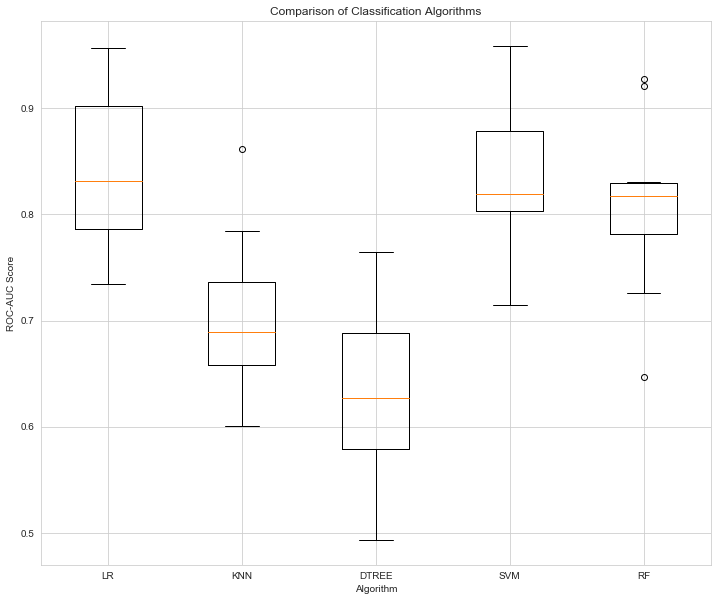

In [41]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [42]:
#training the model
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
#Predicting off of the test set
y_pred = LR.predict(X_test)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       249
           1       0.66      0.42      0.51        45

    accuracy                           0.88       294
   macro avg       0.78      0.69      0.72       294
weighted avg       0.86      0.88      0.87       294



In [45]:
print(confusion_matrix(y_test,pred))

[[247   2]
 [ 38   7]]


### EVALUATION

Through the statistical analysis made on the data set, some vital conclusions can be made.
1. People who left their jobs were significantly earning lower than people who stayed
2. Younger individuals were more likely to leave their job
3. Single individuals were also more likely to leave their jobs


From the model built, we see that Logistic regression and RandomForest classifier performed best in the model accuracy. The models were able to predict to a high degree individuals that were likely to retain their jobs.


### CHALLENGES

Model did not predict to a high degree of accuracy people who left their job.